# Laboratorio 2-Graficación y análisis con Playstore

In [263]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# inicializador de objetos gráficos
plt.style.use('ggplot')

# para elaborar gráficas
import seaborn as sns
color= sns.color_palette()

import re  # Importar el módulo re para trabajar con expresiones regulares

In [264]:
# Deactivar wWarnings( para el caso e librerias desactualizadas)
import warnings
warnings.filterwarnings('ignore')

In [265]:
# Filtar los datos
df= pd.read_csv('../../datos/playstore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [267]:
# eliminado datos duplicados
df.drop_duplicates(subset='App', inplace=True)

# Limpieza de Datos con  expresiones regulares 

In [268]:
# **************=    Rating   = ************************

In [269]:
# Usar una función lambda para reemplazar NaN con la media de la columna 'Rating'
df['Rating'] = df['Rating'].apply(lambda x: x if pd.notna(x) else df['Rating'].mean())

In [270]:
# **************=      Reviews    = ************************

In [271]:

# Función para reemplazar 'M' con 'millón' y convertir a entero
def replace_and_convert(value):
    value = str(value)  # Convertir el valor a cadena de texto
    if 'M' in value:
        # Usar una expresión regular para extraer el número antes de 'M'
        number = re.sub(r'[^\d.]', '', value)  # Eliminar todo excepto dígitos y puntos
        return int(float(number) * 1_000_000)  # Convertir a entero después de multiplicar por 1,000,000
    else:
        # Convertir el valor directamente a entero
        return int(float(value))



# Aplicar la función para reemplazar y convertir los valores en la columna 'Reviews'
df['Reviews'] = df['Reviews'].apply(lambda x: replace_and_convert(x))


In [272]:
# **************=      Size    = ************************

In [273]:
# Reemplazar 'Varies with device' con np.nan
df['Size'] = df['Size'].apply(lambda x: np.nan if 'Varies with device' in str(x) else str(x))

In [274]:
# Limpiar la columna 'Size' usando una función lambda 
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '') if isinstance(x, str) else x)

In [275]:
# Reemplazar NaN con la moda
size_mode = df['Size'].mode()[0]  # Encuentra la moda

# Reemplazar NaN con la moda utilizando lambda
df['Size'] = df['Size'].apply(lambda x: x if not pd.isna(x) else size_mode)

In [276]:
 # todo queda en MEGAS
df['Size']= df['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x )

In [277]:
# Cambiar toda la columna a numerica
df['Size'] = df['Size'].apply(lambda x: float(x))

In [278]:
# **************=      Installs    = ************************

In [279]:
# Limpiar la columna Installs   usando una función lambda eliminado , y +
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '').replace(',', '') if isinstance(x, str) else x)

In [280]:
# Reemplazar 'Free' con NaN usando lambda
#df['Installs'] = df['Installs'].apply(lambda x: np.nan if x.lower() == 'free' else x)

# Reemplazar 'Free' con 0 usando lambda
df['Installs'] = df['Installs'].apply(lambda x: 0 if str(x).lower() == 'free' else x)

In [281]:
# Cambiar la columna a numerica
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [282]:
# **************=      Type    = ************************

In [283]:
# Reemplazar valores que no sean 'Free' o 'Paid' con NaN
df['Type'] = df['Type'].apply(lambda x: x if str(x).strip().lower() in ['free', 'paid'] else np.nan)

# Encontrar la moda de la columna 'Installs'
moda = df['Type'].mode()[0]

# Llenar los valores NaN con la moda usando lambda
df['Type'] = df['Type'].apply(lambda x: moda if pd.isna(x) else x)

In [284]:
# **************=      Price    = ************************

In [285]:
# columna price
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace('Everyone', '0') if isinstance(x, str) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [286]:
# **************=      Content Rating    = ************************

In [287]:
# llemando valores nulos  con la moda
# Reemplazar NaN con la moda
size_mode = df['Content Rating'].mode()[0]  # Encuentra la moda

# Reemplazar NaN con la moda utilizando lambda
df['Content Rating'] = df['Content Rating'].apply(lambda x: x if not pd.isna(x) else size_mode)


In [288]:
# **************=      Genres    = ************************

In [289]:
# **************=      Last Updated    = ************************

In [290]:
# Función para llenar valores nulos usando datos de la columna anterior con expresiones regulares
def fill_nans_with_previous_regex(row, current_column, previous_column):
    current_value = row[current_column]
    if pd.isnull(current_value):
        return previous_value
    else:
        # Usar expresiones regulares para extraer la fecha
        match = re.search(r'(\w+\s+\d+,\s+\d+)', current_value)
        if match:
            return match.group(1)
        else:
            return previous_value

# Inicializar previous_value como None
previous_value = None

# Aplicar la función a la columna 'Last Updated' usando la columna 'App'
df['Last Updated'] = df.apply(lambda row: fill_nans_with_previous_regex(row, 'Last Updated', 'App'), axis=1)


In [291]:
#null_count = df['Last Updated'].isnull().sum()
#print("Número de valores nulos en 'Last Updated':", null_count)

In [292]:
# Convertir la columna 'Last Updated' a formato de fecha, manejando errores
df['Last Updated'] = df['Last Updated'].apply(lambda x: pd.to_datetime(x, format='%B %d, %Y', errors='coerce'))

In [293]:
# **************=      Current Ver    = ************************

In [294]:
# Función para limpiar la columna 'Current Ver' usando expresiones regulares
def clean_version(version):
    # Patrón para mantener solo dígitos y puntos
    pattern = r'[0-9\.]+'
    # Buscar el patrón en el texto de la versión
    match = re.search(pattern, version)
    if match:
        return match.group()  # Devolver el resultado encontrado
    else:
        return None  # Devolver None si no se encontró ningún número

# Aplicar la función de limpieza a la columna 'Current Ver'
df['Current Ver'] = df['Current Ver'].apply(lambda x: clean_version(str(x)))


In [295]:
# Eliminar filas donde 'Current Ver' es NaN
df = df.dropna(subset=['Current Ver'])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.000000,7,2.6,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,4.175052,0,9.6,10.0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up


In [296]:
# **************=      Android Ver    = ************************(

In [297]:
# Función para limpiar la columna 'Android Ver' usando expresiones regulares
def clean_android_version(version):
    # Patrón para buscar versiones de Android en el formato principal X.Y o X.Y.Z
    pattern = r'(\d+\.\d+(\.\d+)?)'
    # Buscar el patrón en el texto de la versión de Android y extraer la versión encontrada
    match = re.search(pattern, str(version))
    if match:
        return match.group(1)  # Devolver solo la versión encontrada (X.Y o X.Y.Z)
    else:
        return None  # Devolver None si no se encontró ninguna versión válida

# Aplicar la función de limpieza a la columna 'Android Ver'
df['Android Ver'] = df['Android Ver'].apply(lambda x: clean_android_version(x))

# Mostrar los primeros registros para verificar
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.000000,7,2.6,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1
10835,FR Forms,BUSINESS,4.175052,0,9.6,10.0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1


In [298]:
# Eliminar filas donde 'Android Ver' es NaN
df = df.dropna(subset=['Android Ver'])

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8521 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8521 non-null   object        
 1   Category        8521 non-null   object        
 2   Rating          8521 non-null   float64       
 3   Reviews         8521 non-null   int64         
 4   Size            8521 non-null   float64       
 5   Installs        8521 non-null   float64       
 6   Type            8521 non-null   object        
 7   Price           8521 non-null   float64       
 8   Content Rating  8521 non-null   object        
 9   Genres          8521 non-null   object        
 10  Last Updated    8521 non-null   datetime64[ns]
 11  Current Ver     8521 non-null   object        
 12  Android Ver     8521 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 932.0+ KB


In [300]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,8521.000000,8.521000e+03,8521.000000,8.521000e+03,8521.000000,8521
mean,4.164540,1.296461e+05,20.172779,4.046314e+06,1.164948,2017-10-12 07:59:26.201149952
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,1.800000e+01,4.600000,1.000000e+03,0.000000,2017-06-30 00:00:00
50%,4.200000,5.090000e+02,12.000000,5.000000e+04,0.000000,2018-04-16 00:00:00
75%,4.500000,1.652300e+04,28.000000,1.000000e+06,0.000000,2018-07-12 00:00:00
max,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.509005,9.569662e+05,21.623429,2.611944e+07,17.406025,NaN


# Cargando la data limpia para Analizar

In [310]:
# Guardar los datos limpios en un nuevo archivo CSV 
ruta2=r"C:\Users\Rodri\Desktop\PROYECTO\Google-Play-Store-Lab\datos"

df.to_csv(ruta2 +  "/playstore_cleaned.csv", index=False)

In [312]:
# Cargando la data limpia para proceder con las graficas
# Filtar los datos
df= pd.read_csv('../../datos/playstore_cleaned.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
4,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516,FR Calculator,FAMILY,4.000000,7,2.6,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1
8517,FR Forms,BUSINESS,4.175052,0,9.6,10.0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0
8518,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1
8519,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1


In [313]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8521.000000,8.521000e+03,8521.000000,8.521000e+03,8521.000000
mean,4.164540,1.296461e+05,20.172779,4.046314e+06,1.164948
std,0.509005,9.569662e+05,21.623429,2.611944e+07,17.406025
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,1.800000e+01,4.600000,1.000000e+03,0.000000
50%,4.200000,5.090000e+02,12.000000,5.000000e+04,0.000000
75%,4.500000,1.652300e+04,28.000000,1.000000e+06,0.000000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000


# Graficación y análisis

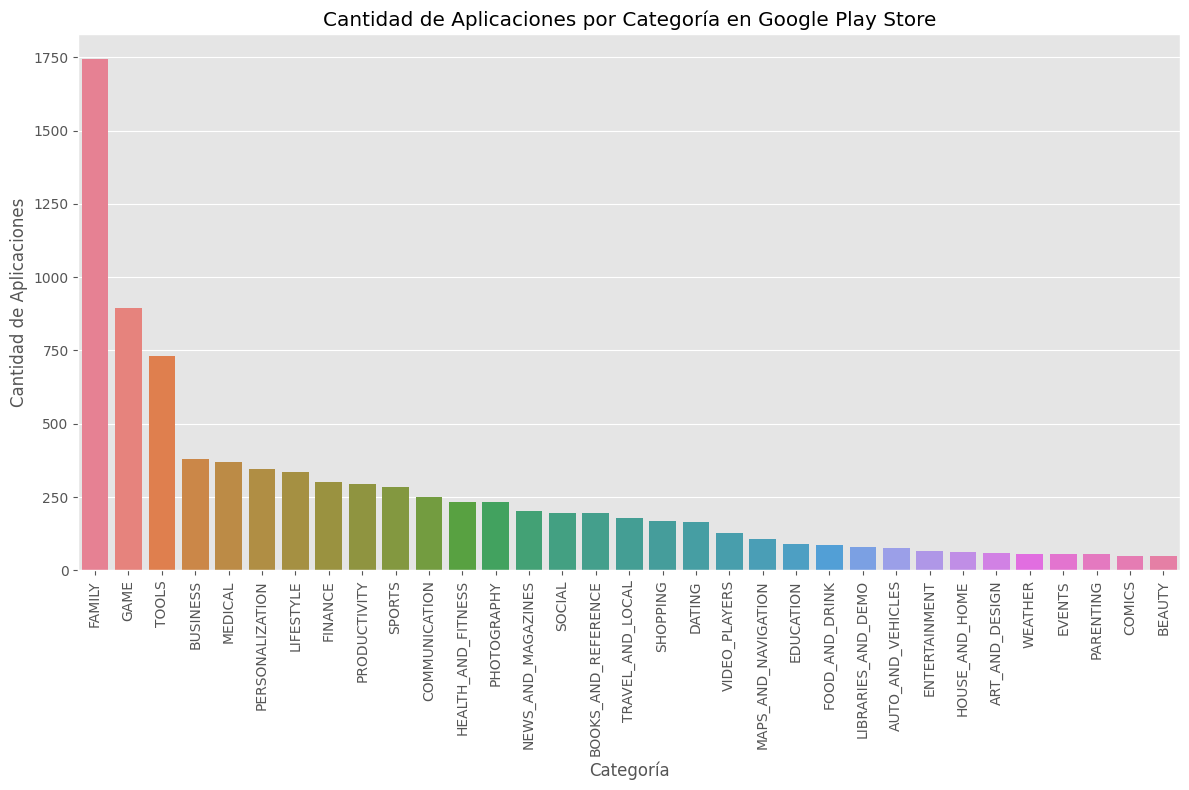

In [369]:
#GTAFICO DE BARRAS
# Crear la figura y el gráfico utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(x='Category', data=df, palette='husl', order=df['Category'].value_counts().index)
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Aplicaciones')
plt.title('Cantidad de Aplicaciones por Categoría en Google Play Store')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

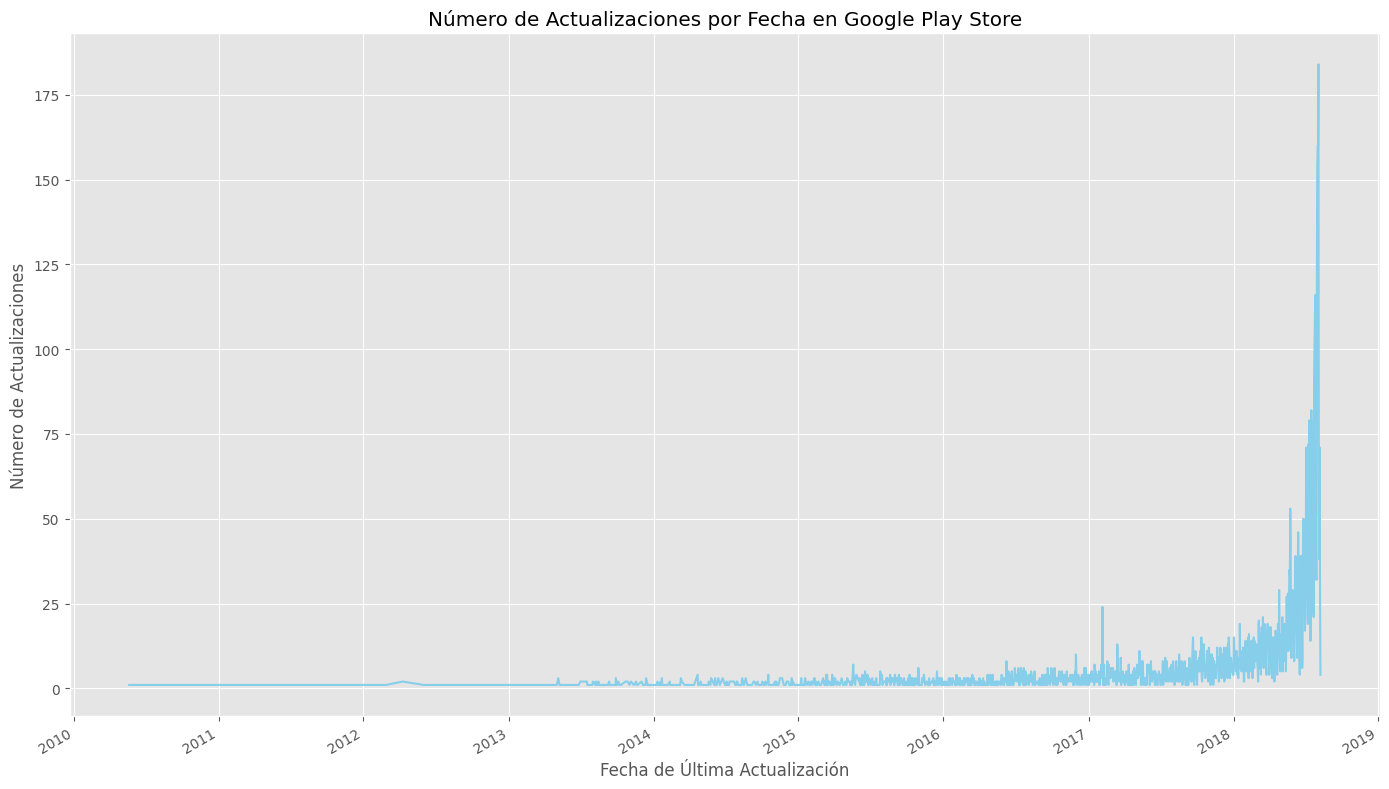

In [364]:
#GRAFICO DE LINEAS DE SERIES TEMPORALES
# Calcular la cantidad de actualizaciones por fecha
update_dates = df.groupby('Last Updated').size()

# Crear el gráfico de líneas de series temporales
plt.figure(figsize=(14, 8))
update_dates.plot(color='skyblue')
plt.xlabel('Fecha de Última Actualización')
plt.ylabel('Número de Actualizaciones')
plt.title('Número de Actualizaciones por Fecha en Google Play Store')
plt.grid(True)
plt.tight_layout()
plt.show()

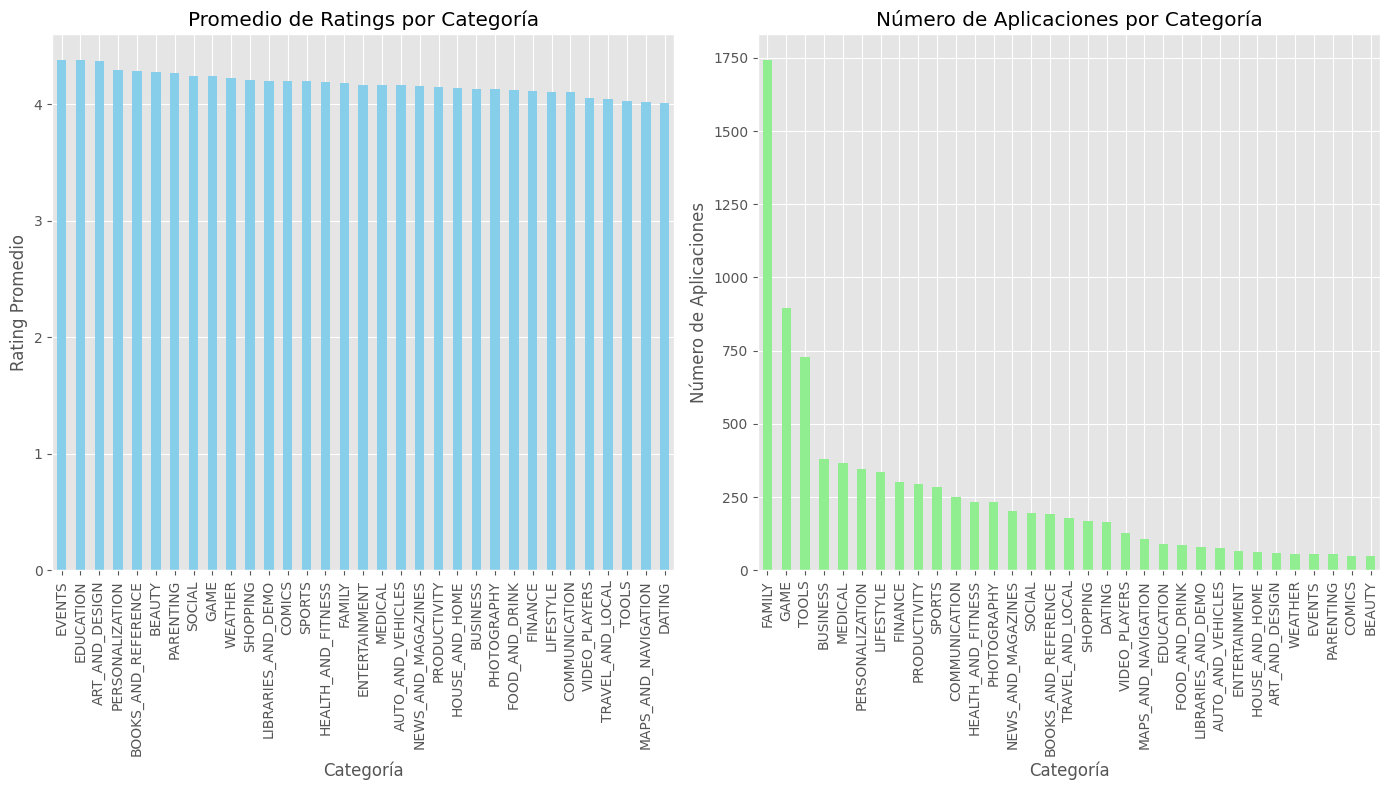

In [377]:
# Calcular el promedio de ratings por categoría
avg_ratings_by_category = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Calcular el conteo de aplicaciones por categoría
app_counts_by_category = df_cleaned['Category'].value_counts()

# Visualización con gráfico de barras agrupadas
plt.figure(figsize=(14, 8))

# Gráfico de barras para promedio de ratings
plt.subplot(1, 2, 1)
avg_ratings_by_category.plot(kind='bar', color='skyblue')
plt.title('Promedio de Ratings por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=90)

# Gráfico de barras para conteo de aplicaciones por categoría
plt.subplot(1, 2, 2)
app_counts_by_category.plot(kind='bar', color='lightgreen')
plt.title('Número de Aplicaciones por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Aplicaciones')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()